<a href="https://colab.research.google.com/github/Sravani4415/Paradise/blob/main/Copy_of_dog%26cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten, RandomFlip
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
Train='/content/drive/MyDrive/Images/Images/Train/Dog'

In [ ]:
Train

'/content/drive/MyDrive/Images/Images/Train/Dog'

In [5]:
Train='/content/drive/MyDrive/Images/Images/Train/Cat'

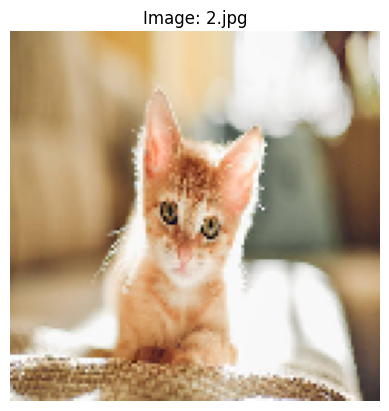

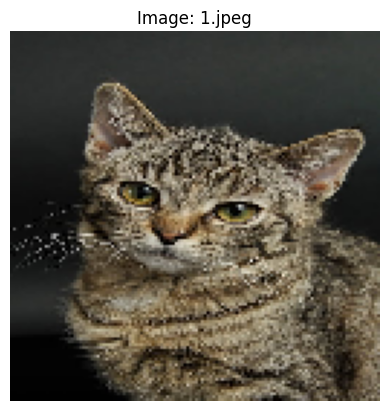

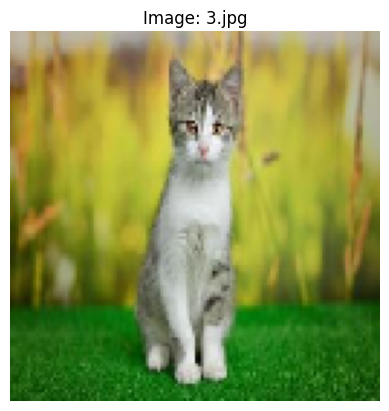

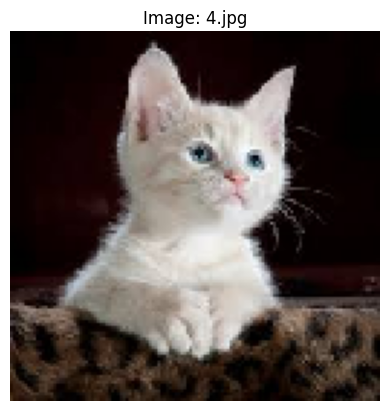

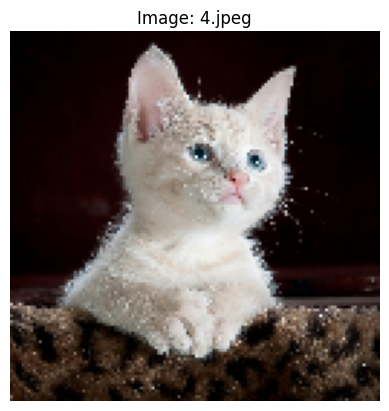

In [6]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Set your folder path
folder_path = '/content/drive/MyDrive/Images/Images/Train/Cat'

# List image files (jpg/png)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Show first 5 images
for i in range(min(5, len(image_files))):
    img_path = os.path.join(folder_path, image_files[i])
    img = image.load_img(img_path, target_size=(128, 128))

    plt.imshow(img)
    plt.title(f"Image: {image_files[i]}")
    plt.axis('off')
    plt.show()

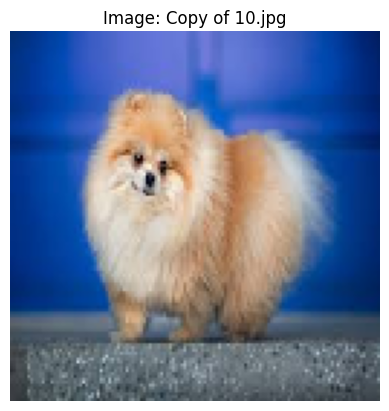

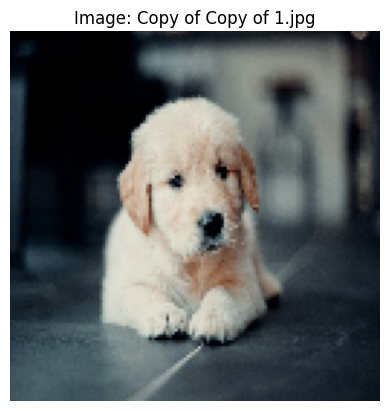

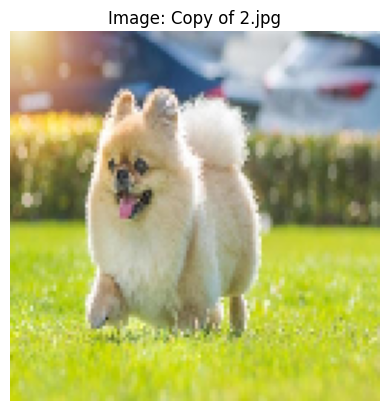

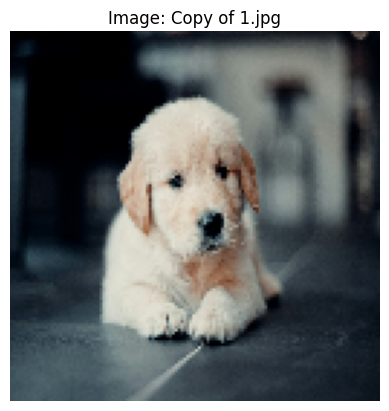

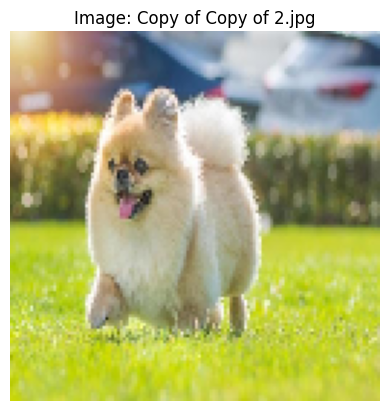

In [8]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Set your folder path
folder_path = '/content/drive/MyDrive/Images/Images/Train/Dog'

# List image files (jpg/png)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Show first 5 images
for i in range(min(5, len(image_files))):
    img_path = os.path.join(folder_path, image_files[i])
    img = image.load_img(img_path, target_size=(128, 128))

    plt.imshow(img)
    plt.title(f"Image: {image_files[i]}")
    plt.axis('off')
    plt.show()

In [9]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:

Train_path='/content/drive/MyDrive/Images/Images/Train/Cat'

In [11]:

import os
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten, RandomFlip
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [12]:
base_dir = '/content/drive/MyDrive/Images/Images'
Train_dir = os.path.join(base_dir, 'Train')
Test_dir = os.path.join(base_dir, 'Test')

In [13]:
Train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

Test_datagen = ImageDataGenerator(rescale=1./255)

img_size = (150, 150)
batch_size = 32

Train_generator = Train_datagen.flow_from_directory(
   Train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = Test_datagen.flow_from_directory(
    Test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 17 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


In [14]:
# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:

model.fit(
    Train_generator,
    steps_per_epoch=Train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the model
model.save("dog_cat_classifier.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.7059 - loss: 0.6827 - val_accuracy: 0.5294 - val_loss: 0.6819
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5294 - loss: 0.7155 - val_accuracy: 0.4706 - val_loss: 0.8875
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4706 - loss: 0.8632 - val_accuracy: 0.8824 - val_loss: 0.5972
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8824 - loss: 0.6103 - val_accuracy: 0.6471 - val_loss: 0.5576
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6471 - loss: 0.5615 - val_accuracy: 0.6471 - val_loss: 0.4962
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6471 - loss: 0.5058 - val_accuracy: 1.0000 - val_loss: 0.4121
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9412 - loss: 0.4441 - val_accuracy: 1.0000 - val_loss: 0.3274
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.3411 - val_accuracy: 0.8824 - val_loss: 0.2780
Epoch 9/10
1/1

In [16]:

!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00


In [17]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model("dog_cat_classifier.h5")

# Ensure the model is compiled (to avoid warnings)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prediction function
def predict_pet(img):
    # Resize image to model's expected input size
    img = img.resize((150, 150))

    # Convert to array and normalize
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)[0][0]  # Binary classification output

    # Return the class based on threshold
    if prediction >= 0.5:
        return "Dog 🐶"
    else:
        return "Cat 🐱"

# Gradio interface setup
interface = gr.Interface(
    fn=predict_pet,
    inputs=gr.Image(type="pil", label="Upload an image"),
    outputs=gr.Text(label="Prediction"),
    title="Dog vs Cat Classifier",
    description="Upload an image to detect whether it's a Dog or a Cat.",
    theme="default"
)

# Launch the app
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8ff977bc73d3ccdc51.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
